In [1]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Download data for Apple, Samsung, and the NASDAQ-100 Technology Index
apple = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
samsung = yf.download('005930.KS', start='2018-01-01', end='2023-12-31')
nasdaq_tech = yf.download('^NDXT', start='2018-01-01', end='2023-12-31')
apple.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568924,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561863,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750271,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214218,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061150,82271200


In [3]:
# Calculate daily returns
apple['Daily Return'] = apple['Adj Close'].pct_change()
samsung['Daily Return'] = samsung['Adj Close'].pct_change()
nasdaq_tech['Daily Return'] = nasdaq_tech['Adj Close'].pct_change()

In [4]:
apple[['Adj Close', 'Daily Return']].head()
samsung[['Adj Close', 'Daily Return']].head()
nasdaq_tech[['Adj Close', 'Daily Return']].head()

,Adj Close,Daily Return
Date,,
2018-01-02,3995.959961,NaN
2018-01-03,4044.330078,0.012105
2018-01-04,4071.280029,0.006664
2018-01-05,4102.370117,0.007636
2018-01-08,4129.020020,0.006496


In [5]:
# Normalize prices for comparison
apple['Normalized Price'] = apple['Adj Close'] / apple['Adj Close'].iloc[0]
samsung['Normalized Price'] = samsung['Adj Close'] / samsung['Adj Close'].iloc[0]
nasdaq_tech['Normalized Price'] = nasdaq_tech['Adj Close'] / nasdaq_tech['Adj Close'].iloc[0]

In [6]:
apple[['Adj Close', 'Normalized Price']].head()
samsung[['Adj Close', 'Normalized Price']].head()
nasdaq_tech[['Adj Close', 'Normalized Price']].head()

,Adj Close,Normalized Price
Date,,
2018-01-02,3995.959961,1.000000
2018-01-03,4044.330078,1.012105
2018-01-04,4071.280029,1.018849
2018-01-05,4102.370117,1.026629
2018-01-08,4129.020020,1.033299


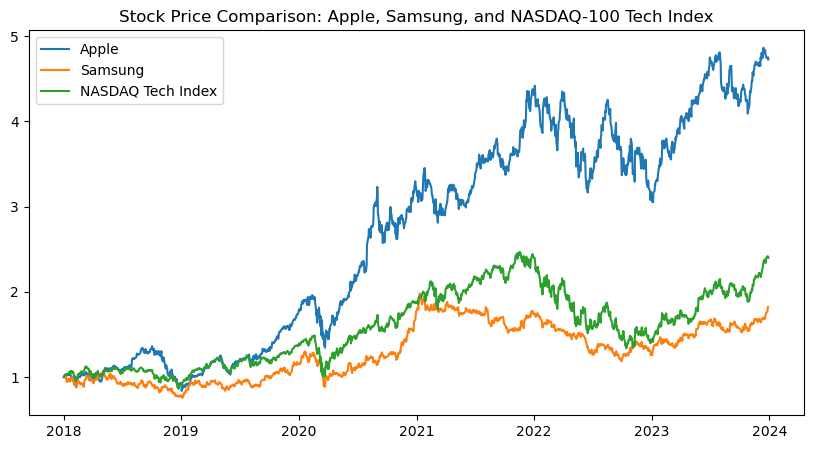

In [10]:
# Plot normalized stock prices for comparison
plt.figure(figsize=(10,5))
plt.plot(apple['Normalized Price'], label='Apple')
plt.plot(samsung['Normalized Price'], label='Samsung')
plt.plot(nasdaq_tech['Normalized Price'], label='NASDAQ Tech Index')
plt.title('Stock Price Comparison: Apple, Samsung, and NASDAQ-100 Tech Index')
plt.legend()
plt.show()

In [11]:
plt.savefig('my_plot1.png')

<Figure size 640x480 with 0 Axes>

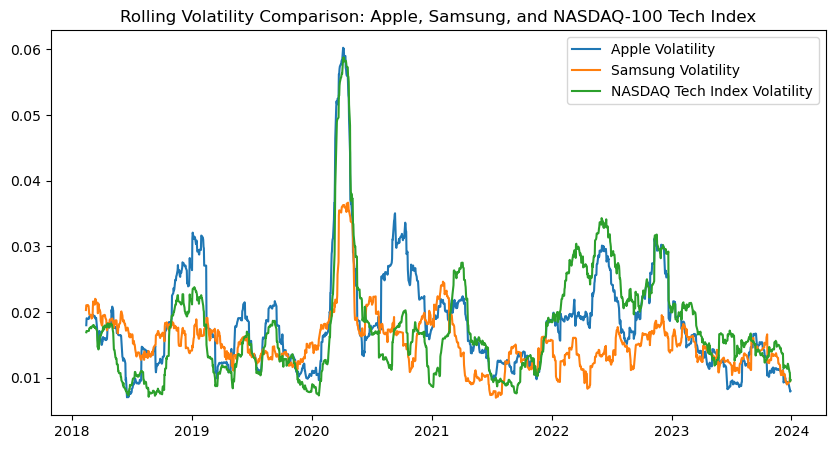

In [8]:
apple['Volatility'] = apple['Daily Return'].rolling(window=30).std()
samsung['Volatility'] = samsung['Daily Return'].rolling(window=30).std()
nasdaq_tech['Volatility'] = nasdaq_tech['Daily Return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(10,5))
plt.plot(apple['Volatility'], label='Apple Volatility')
plt.plot(samsung['Volatility'], label='Samsung Volatility')
plt.plot(nasdaq_tech['Volatility'], label='NASDAQ Tech Index Volatility')
plt.title('Rolling Volatility Comparison: Apple, Samsung, and NASDAQ-100 Tech Index')
plt.legend()
plt.show()

In [9]:
plt.savefig('my_plot2.png')

<Figure size 640x480 with 0 Axes>